In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine


In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

**Customer Segmentation-->**

In [5]:
customer_transactions = transactions.groupby("CustomerID").agg({"TotalValue": "sum", "TransactionID": "count"}).reset_index()
customer_transactions.rename(columns={"TotalValue": "TotalSpend", "TransactionID": "TransactionCount"}, inplace=True)
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)


In [6]:
clustering_data = customer_data[["TotalSpend", "TransactionCount"]]

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

**Starting with K -means Clustering**

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(clustering_data_scaled)


# **Evaluate Using Davies-Bouldin (DB) Index**

In [8]:
db_index = davies_bouldin_score(clustering_data_scaled, customer_data["Cluster"])
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.7963338823953641


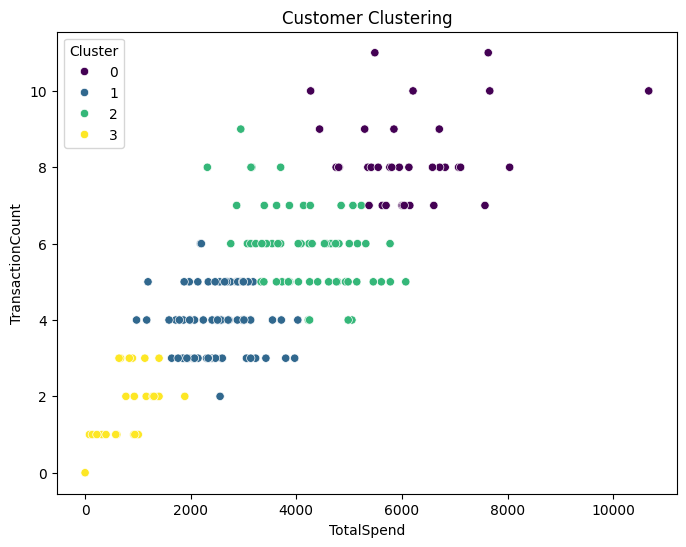

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data["TotalSpend"], y=customer_data["TransactionCount"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Clustering")
plt.show()